## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [2]:
#Imports
import matplotlib
import cv2
import math
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

<IPython.core.display.Javascript object>


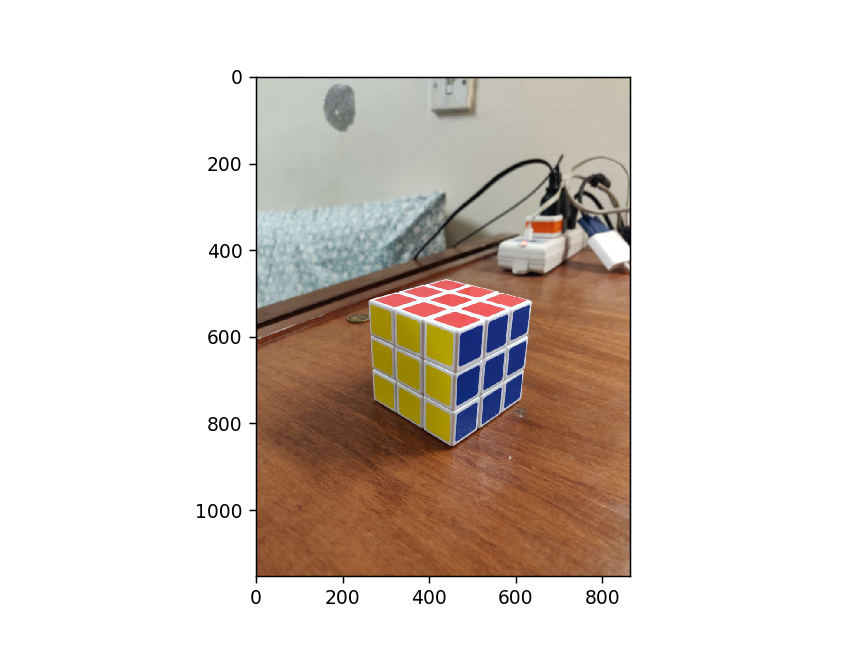

In [3]:
#TODO
img = np.array(mpimg.imread('C:/Users/Dell/Downloads/12.jpeg'))
#replace this with your path of image


figure(dpi = 300)
%matplotlib notebook 
plt.imshow(img)
plt.show()

img.setflags(write=1) 




<IPython.core.display.Javascript object>


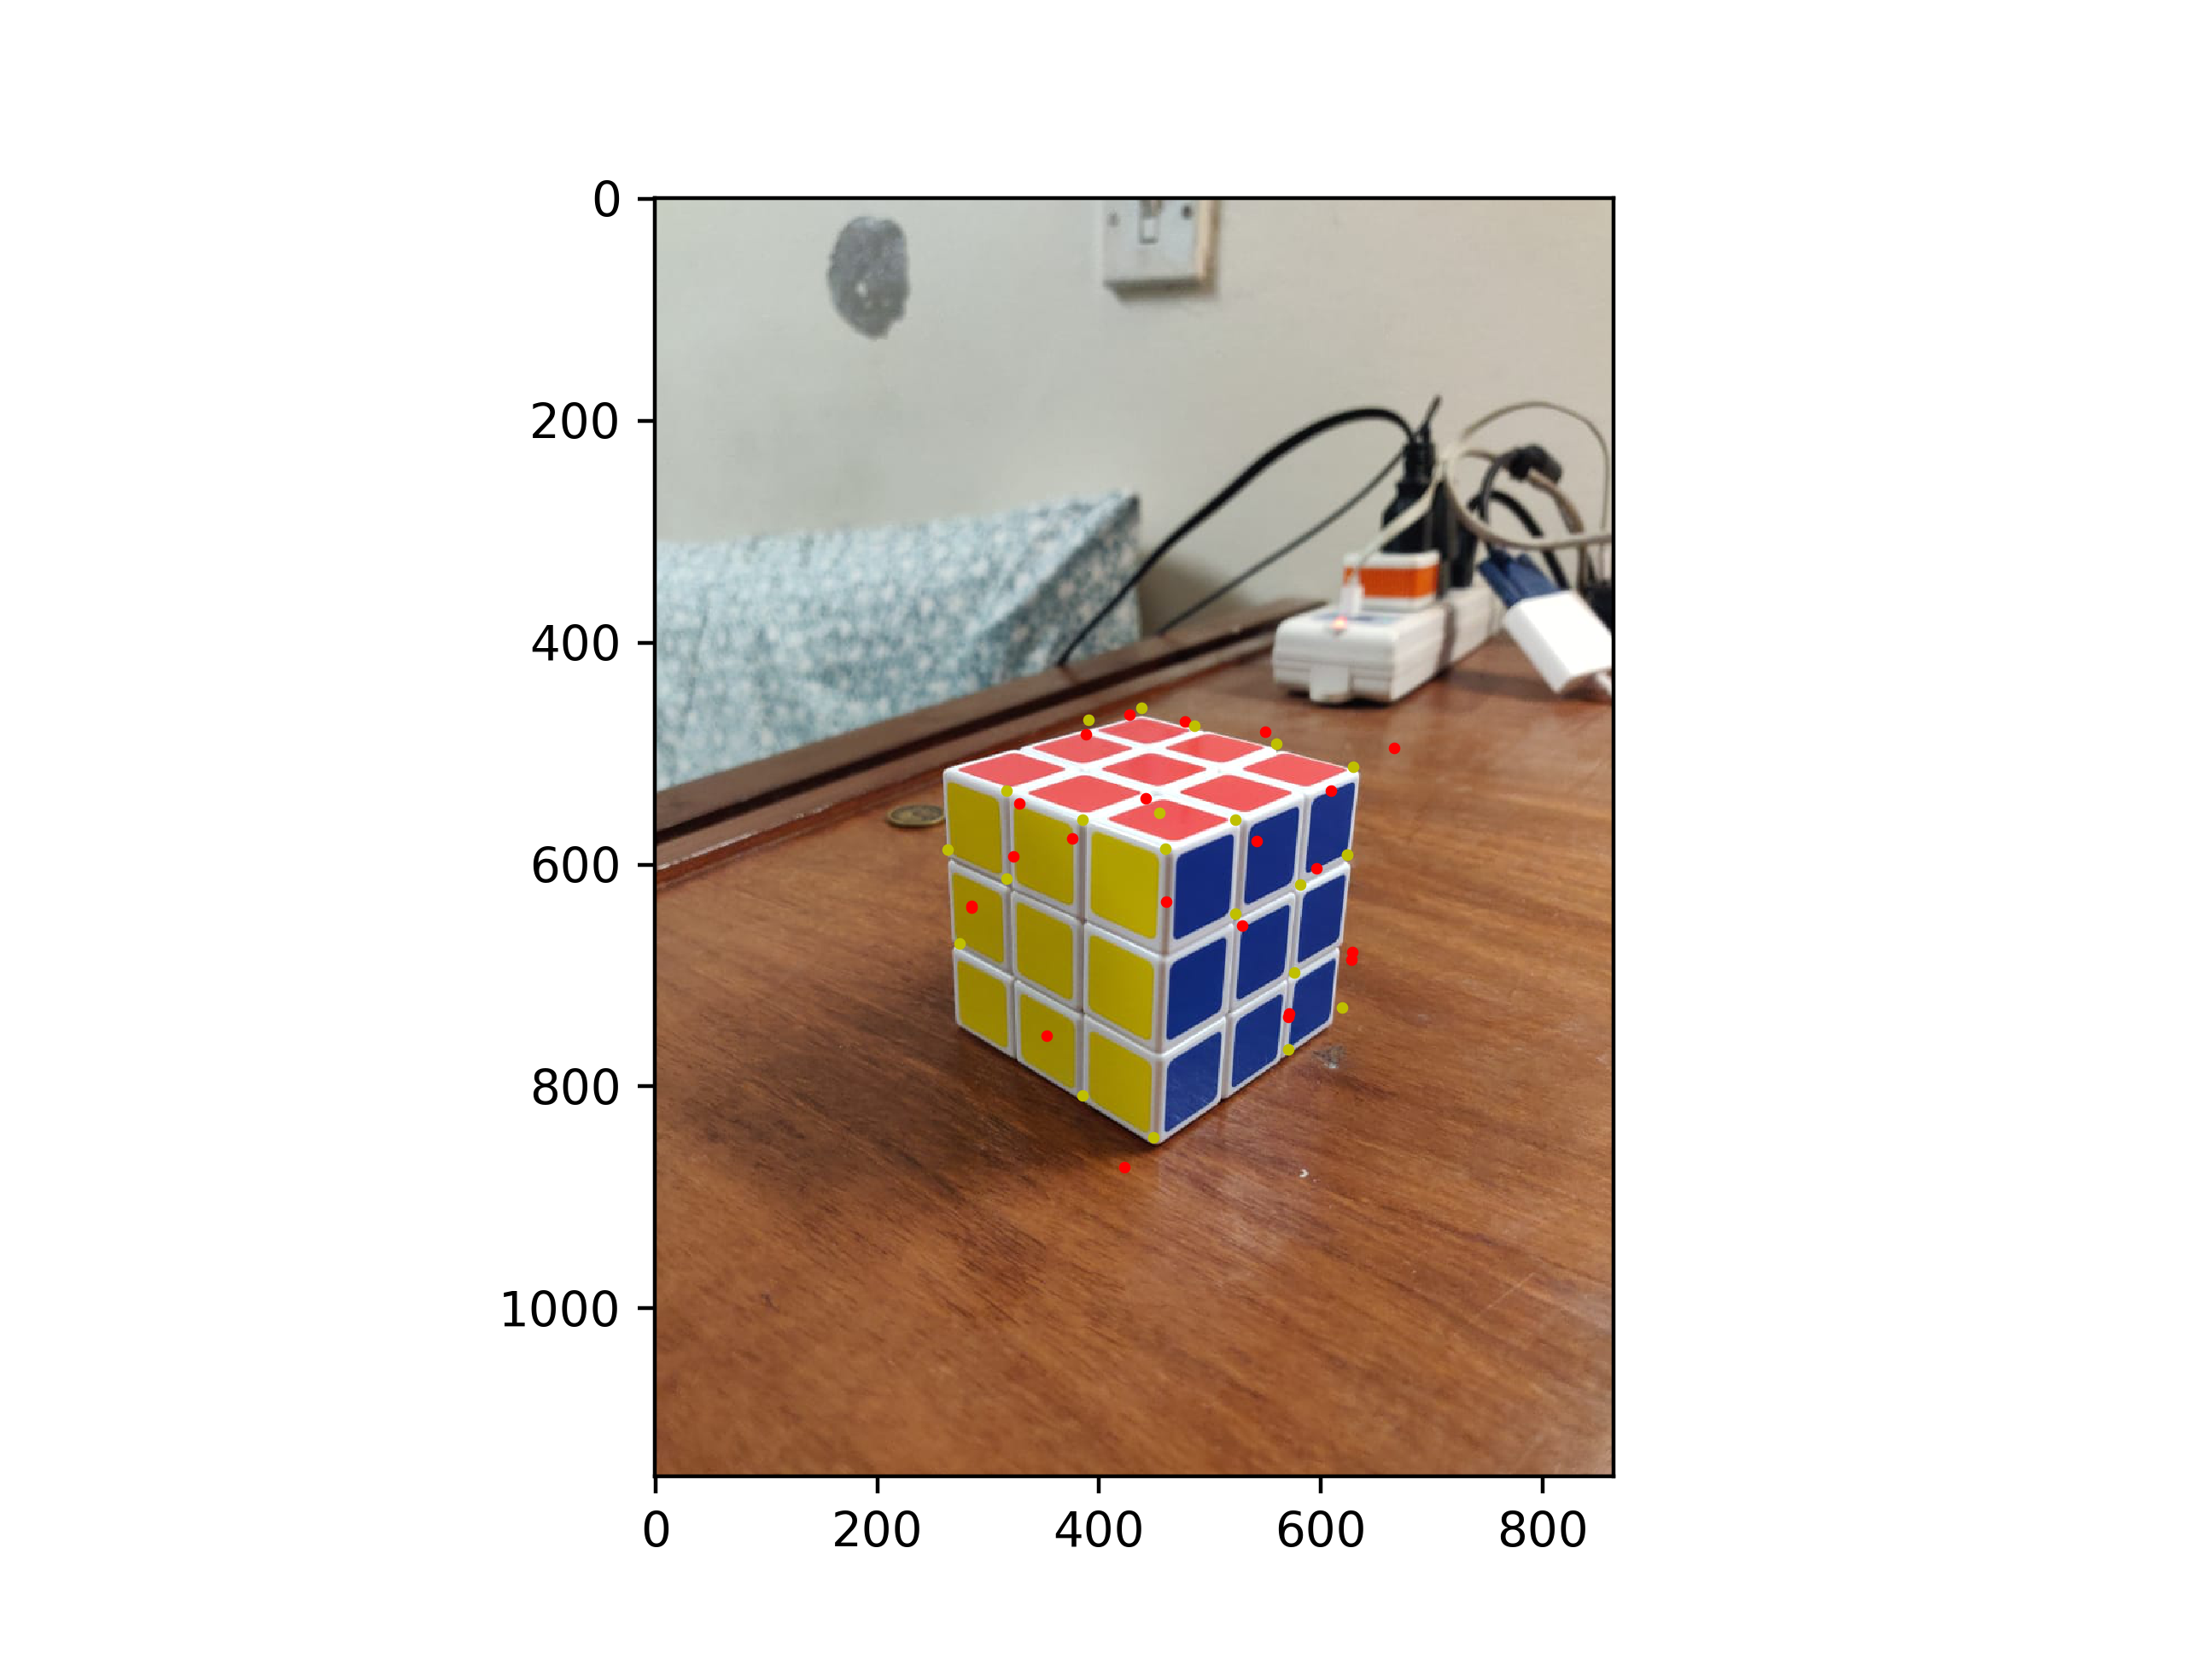

1038609402.6441956


In [13]:
x= np.array([54, 36, 54, 36, 18, 18, 54, 54, 54, 54, 36, 18, 0, 0, 36, 54,  54, 54, 54, 54,  0, 0 ])
y= np.array([0, 0, 18, 18, 0, 0, 18, 36, 36, 54, 54, 54, 54 ,36, 0,0 , 36, 54, 36, 54, 0 , 0 ])
z= np.array([ 54, 54, 54, 54, 54, 36, 36, 36, 54, 54, 54, 54 , 54, 54, 0 ,0 , 0 , 0 , 1, 2 , 1 , 2])

realx= np.array([459.5, 385.3, 523.1, 454.2, 316.46, 316.46, 523.0, 581.36, 623.75, 629.0, 560.1, 486.0, 438.3 , 390.1, 385.3, 448.9, 570.7, 618.95, 576.07, 623.7, 274.08, 263.5])
realy= np.array([585.986, 559.69, 559.69 , 553.2, 533.2, 612.67, 644.46, 617.97, 591.48, 512.01, 490.818, 474.92, 459.0, 469.626, 808.1, 845.7, 766.3, 729.2, 697, 591.48, 670.9, 586.18])

mat = np.zeros(shape=(44,12))

i=0
j=0
while j<43:
    mat[j]=x[i],y[i],z[i],1,0,0,0,0,-realx[i]*x[i],-realx[i]*y[i],-realx[i]*z[i],-realx[i]
    mat[j+1]=0,0,0,0,x[i],y[i],z[i],1,-realy[i]*x[i],-realy[i]*y[i],-realy[i]*z[i],-realy[i]
    j=j+2
    i=i+1
    

U, S, V =  np.linalg.svd(mat)

#Vtrans= V.transpose()

p= V[11]

Project= np.zeros(shape=(3,4))
c=0
for i in range(3):
    for j in range(4):
        Project[i][j]= p[c]
        c= c+1
        
ones= np.ones(22, dtype= int)


#print(Project)
#x.shape


combined= np.vstack((x, y , z, ones))
#combined2 = np.zeros(shape=(4,22))
#print(combined)

finalproject= Project @ combined

#print(finalproject)

zaxis= finalproject[2]



for i in range(22):
    finalproject[0][i]= finalproject[0][i]/ zaxis[i]

    
for i in range(22):
    finalproject[1][i]= finalproject[1][i]/ zaxis[i]
    
for i in range(22):
    finalproject[2][i]= finalproject[2][i]/ zaxis[i]
    
#finalproject



img = np.array(mpimg.imread('C:/Users/Dell/Downloads/12.jpeg'))
#replace this with your path of image


figure(dpi = 300)
plt.imshow(img)

plt.scatter(finalproject[0], finalproject[1], c='r', s=2)

plt.scatter(realx, realy, c='y', s=2)

sum1=0
for i in range(22):
    sum1 += (finalproject[0][i]-realx[i])**2 + (finalproject[1][i]-realy[i])**2
error= (math.pow (sum1, 2))

print(error)


## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [14]:
def decomposition(arr):
    return np.linalg.qr(arr)

## Part 3 (30 marks)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

In [15]:
#TODO
#matrix=np.zeros(shape=(3,4))
mat= Project

#mat=Project
_,_,V=np.linalg.svd(mat)
index=len(V)
point=V[index-1]
print("Point: ",point)

updated_matrix = np.delete(mat, 3, -1)

#print (updated_matrix)
Q, R=decomposition(updated_matrix)
print("R matrix: " , R)

Point:  [ 0.55591824 -0.31528396  0.76909471  0.00665272]
R matrix:  [[ 6.33745819e-03 -1.93722409e-03  3.25694068e-03]
 [ 0.00000000e+00  4.55111394e-03  1.31120981e-03]
 [ 0.00000000e+00  0.00000000e+00  6.42872583e-06]]


## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

 focal length is f: ( 2.9340084214437585e-05 , 2.1056803223865437e-05 )mm


<IPython.core.display.Javascript object>


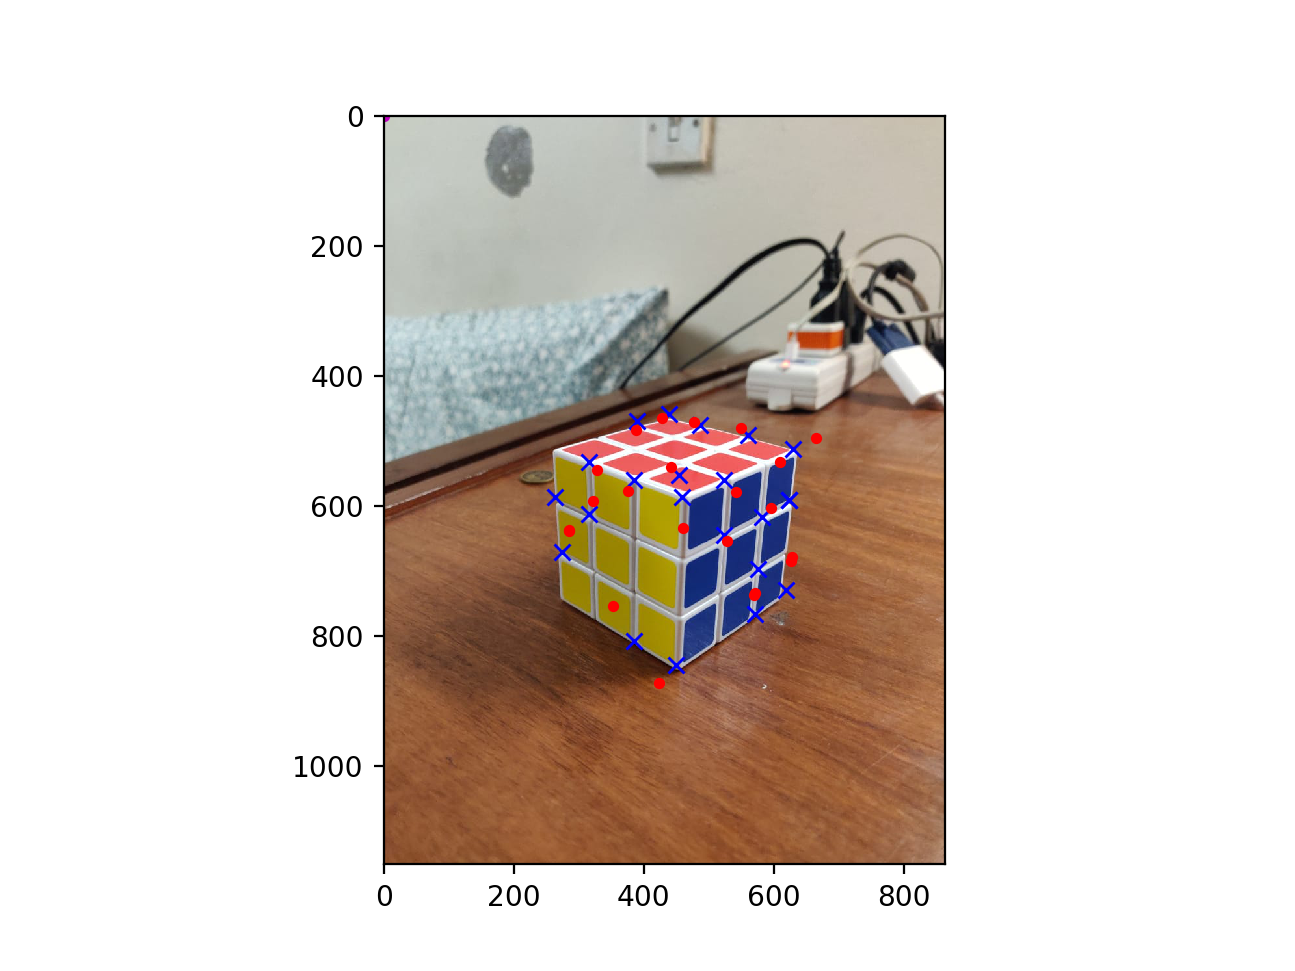

In [16]:
#TODO
sensorsize = np.array([5.33,4])
mxf = np.abs(R[0][0])
myf = np.abs(R[1][1])
mx = img.shape[1]/sensorsize[1]
my = img.shape[0]/sensorsize[0]
fx = mxf/mx
fy = myf/my

print(" focal length is f: (", fx, ",",fy,")mm")
ppoint = np.array([R[0, R.shape[1]-1], R[1, R.shape[1]-1], R[2, R.shape[1]-1]])
img.setflags(write=1)
figure(dpi=150)
plt.imshow(img)
for i in range(len(x)):
    plt.plot(realx[i], realy[i], 'bx')
    cords = Project @ np.array([x[i], y[i], z[i], 1])
    xaxis = cords[0]/cords[2]
    yaxis = cords[1]/cords[2]
    plt.plot(xaxis, yaxis, 'r.')
plt.plot(ppoint[0], ppoint[1], 'm.')

## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

In [17]:
# your answer/code goes here
'''
My error came out to be very large , because my figure in part1 was very small so exact coordinates could not be taken 
and that is the reason the projection was also off. To make this better what we could do is we can take more points on
the image to get a better idea , and the initial matrix we calculated would be more accurate. So for example i took 22 
points, we could take around 10/15 more and then when i checked, the error decreased. 

Secondly what we could do is calibrate the camera through different angles, this was only one perspective ,
we could take different perspectives/ angles and then repeat the procedure as well.



'''

'\nMy error came out to be very large , because my figure in part1 was very small so exact coordinates could not be taken \nand that is the reason the projection was also off. To make this better what we could do is we can take more points on\nthe image to get a better idea , and the initial matrix we calculated would be more accurate. So for example i took 22 \npoints, we could take around 10/15 more and then when i checked, the error decreased. \n\nSecondly what we could do is calibrate the camera through different angles, this was only one perspective ,\nwe could take different perspectives/ angles and then repeat the procedure as well.\n\n\n\n'

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

In [ ]:
# your answer goes here